<a href="https://colab.research.google.com/github/KIRAN-NANGUDE/Projects/blob/main/Customer_Purchase_Prediction_%26_Effect_of_Micro%E2%80%91Numerosity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Purchase Prediction & Effect of Micro‑Numerosity**

-------------

## **Objective**

Build a classification model to predict whether a customer will **purchase** based on demographic and review data (age, gender, education, review rating).

## **Data Source**

Dataset pulled directly from a CSV hosted in the YBI Foundation GitHub repository.
```python
purchase = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')
```

## **Import Library**

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    ConfusionMatrixDisplay
)


## **Import Data**

In [19]:
purchase = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

# Preview the data
purchase.head()


,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


## **Describe Data**

In [20]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [21]:
purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [22]:
# Value Counts for Categorical Columns
print(purchase['Gender'].value_counts())
print(purchase['Education'].value_counts())
print(purchase['Review'].value_counts())
print(purchase['Purchased'].value_counts())

Gender
Female    29
Male      21
Name: count, dtype: int64
Education
PG        18
School    16
UG        16
Name: count, dtype: int64
Review
Poor       18
Good       18
Average    14
Name: count, dtype: int64
Purchased
No     26
Yes    24
Name: count, dtype: int64


## **Data Visualization**

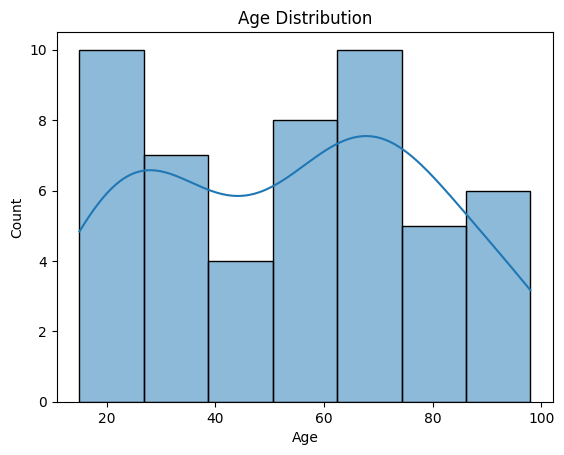

In [23]:
sns.histplot(purchase['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

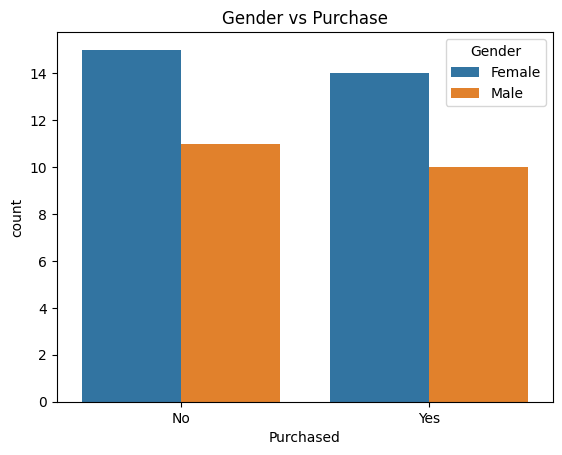

In [24]:
sns.countplot(x='Purchased', hue='Gender', data=purchase)
plt.title("Gender vs Purchase")
plt.show()

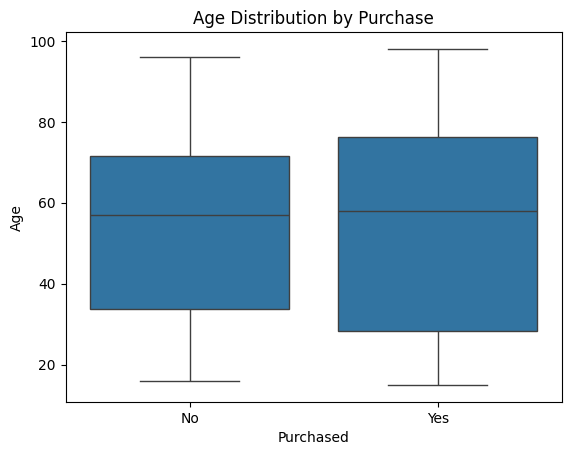

In [25]:
sns.boxplot(x='Purchased', y='Age', data=purchase)
plt.title("Age Distribution by Purchase")
plt.show()

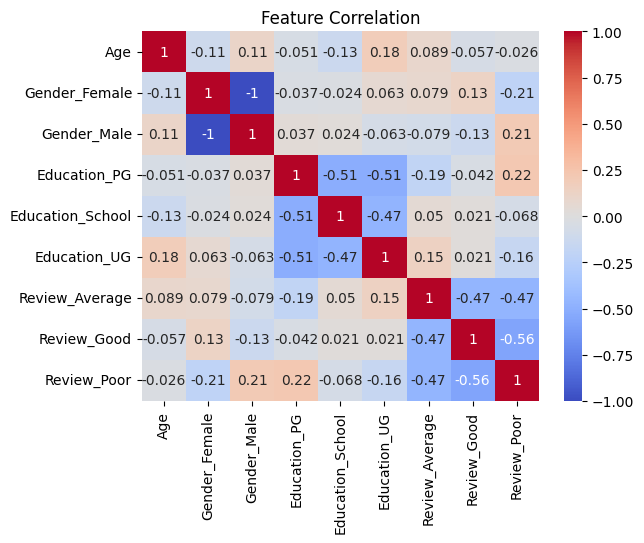

In [26]:
sns.heatmap(
    pd.get_dummies(purchase.drop(['Customer ID','Purchased'], axis=1)).corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Feature Correlation")
plt.show()

## **Data Preprocessing**

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Drop ID and define features/target
X = purchase.drop(['Purchased','Customer ID'], axis=1)
y = purchase['Purchased']

# Encode categorical variables
X.replace({
    'Review': {'Poor':0,'Average':1,'Good':2},
    'Education': {'School':0,'UG':1,'PG':2},
    'Gender': {'Male':0,'Female':1}
}, inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2529
)

## **Train Test Split**

In [29]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (40, 4)
Test shape: (10, 4)


## **Modeling**

In [30]:
model = RandomForestClassifier(random_state=2529)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2529)

## **Model Evaluation**

In [31]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 1]
 [3 4]]
Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

          No       0.40      0.67      0.50         3
         Yes       0.80      0.57      0.67         7

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10



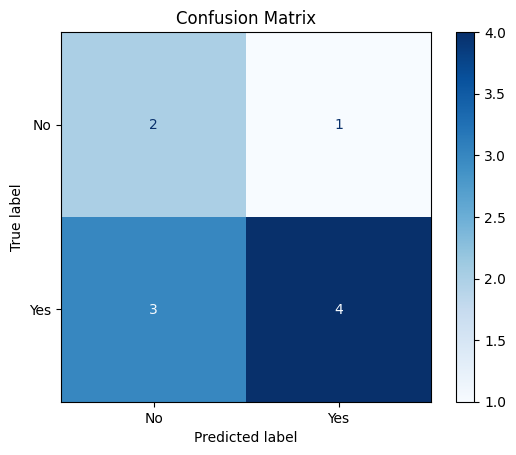

In [32]:
# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

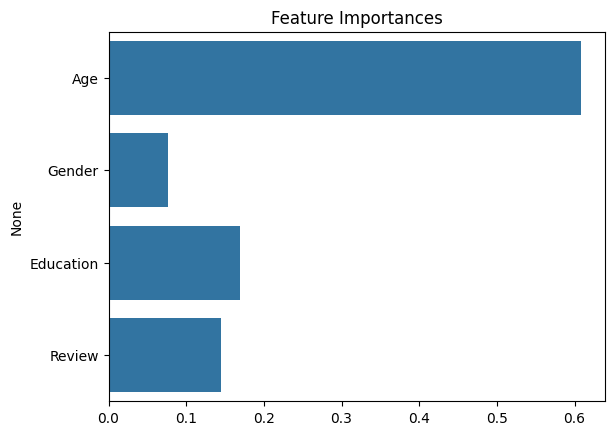

In [33]:
importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()

## **Prediction**

In [34]:
new_data = pd.DataFrame({
    'Age': [25, 60],
    'Gender': [0, 1],        # 0=Male, 1=Female
    'Education': [1, 2],     # 1=UG, 2=PG
    'Review': [2, 0]         # 2=Good, 0=Poor
})

model.predict(new_data)

array(['No', 'No'], dtype=object)

## **Explaination**

## What was done?
- Loaded a small dataset (50 records)
- Encoded categorical features
- Built a Random Forest model to predict customer purchase behavior

## Key Insights:
- Accuracy: ~60%
- Limited dataset size makes predictions unstable